In [77]:
import numpy as np
import random
import time 

In [86]:
## define node strucutre
class Node:
    def __init__(self,parent,position):
        self.parent = parent
        self.position = position
        self.f = 0
        self.g = 0
        self.h = 0
        
    def __lt__(self,other):
        return self.f <= other.f

        
## define path function 
# def path_finder(current_node,grid):
#     print('current_node from path_finder',current_node.position)
    
    
    
## define search function 
def weighted_search(grid,start,end,weight_grid):
    ## turn Nodify start,end point
    start_node = Node(None,start)
    end_node = Node(None,end)
    
    ## create two list --> open_lst, and close_lst 
    ## open_lst: store children nodes 
    ## close_lst: store path node --> path_finder
    open_lst = []
    close_lst = []
    
    open_lst.append(start_node)
    current_node = open_lst[0]
    
    n_row,n_col = np.shape(grid)
    n_row = n_row -1
    n_col = n_col -1
    
    ## put start node into open_lst
    ## loop control, if open lst is not empty
    while len(open_lst)>0:
        
        ## sort open_lst to get the min f val node 
        ## pop that node and set it to current_node
        ## if current_node == end goal, return
            ## else get current_node children
            ## check its children 1. valid? 2. walkable
                ## if yes, append to open_lst 
                ## else, continue
        
        
        open_lst.sort()
#         print("open_lst after sort",[x.position for x in open_lst])
#         print("f value",[x.f for x in open_lst])
        current_node = open_lst.pop(0)
        close_lst.append(current_node)
        if current_node.position == end_node.position:
            return path_finder(current_node,grid,start_node,end_node)
        ## get current_node children
        child_loc = [
            [0,-1], ## moving left
            [0,1],  ## moving right
            [1,0],  ## moving down
            [-1,0] ## moving up
        ]
        
        for child in child_loc:
            ## check if child in open or close lst 
            ## check if child is valid 
            ## check if child is walkale
            ## add node to the open_lst
            mving_child = [current_node.position[0]+child[0],current_node.position[1]+child[1]]
            if mving_child not in [x.position for x in open_lst]:
                if mving_child not in [y.position for y in close_lst]:
                    if 0<=mving_child[0] <= n_row and 0<=mving_child[1] <=n_col:
                        if grid[mving_child[0]][mving_child[1]] != 1:
                            ## create new node
                            mving_node = Node(current_node,mving_child)
                            open_lst.append(mving_node)
        
        
        ## caluclate f,g,h
        ## heuristic: manhattan 
        for children in open_lst:
#             print("children",children.position)
            cost = weight_grid[children.position[0]][children.position[1]]
            children.g = children.g +cost
            children.h = abs(children.position[0]-end_node.position[0])+ abs(children.position[1]-end_node.position[1])
            children.f = children.g + children.h
            
#         print("close_lst",[x.position for x in close_lst])
#         print("open_lst",[x.position for x in open_lst])
#         print("f value",[x.f for x in open_lst])
#         print("current_node",current_node.position)
#         print("---------------------")
    
    return path_finder(current_node,grid,start_node,end_node)
        


In [87]:
def normal_search(grid,start,end,cost):
    ## turn Nodify start,end point
    start_node = Node(None,start)
    end_node = Node(None,end)
    
    ## create two list --> open_lst, and close_lst 
    ## open_lst: store children nodes 
    ## close_lst: store path node --> path_finder
    open_lst = []
    close_lst = []
    
    open_lst.append(start_node)
    current_node = open_lst[0]
    
    n_row,n_col = np.shape(grid)
    n_row = n_row -1
    n_col = n_col -1
    
    ## put start node into open_lst
    ## loop control, if open lst is not empty
    while len(open_lst)>0:
        
        ## sort open_lst to get the min f val node 
        ## pop that node and set it to current_node
        ## if current_node == end goal, return
            ## else get current_node children
            ## check its children 1. valid? 2. walkable
                ## if yes, append to open_lst 
                ## else, continue
        
        
        open_lst.sort()
#         print("open_lst after sort",[x.position for x in open_lst])
#         print("f value",[x.f for x in open_lst])
        current_node = open_lst.pop(0)
        close_lst.append(current_node)
        if current_node.position == end_node.position:
            return path_finder(current_node,grid,start_node,end_node)
        ## get current_node children
        child_loc = [
            [0,-1], ## moving left
            [0,1],  ## moving right
            [1,0],  ## moving down
            [-1,0] ## moving up
        ]
        
        for child in child_loc:
            ## check if child in open or close lst 
            ## check if child is valid 
            ## check if child is walkale
            ## add node to the open_lst
            mving_child = [current_node.position[0]+child[0],current_node.position[1]+child[1]]
            if mving_child not in [x.position for x in open_lst]:
                if mving_child not in [y.position for y in close_lst]:
                    if 0<=mving_child[0] <= n_row and 0<=mving_child[1] <=n_col:
                        if grid[mving_child[0]][mving_child[1]] != 1:
                            ## create new node
                            mving_node = Node(current_node,mving_child)
                            open_lst.append(mving_node)
        
        
        ## caluclate f,g,h
        ## heuristic: manhattan 
        for children in open_lst:
            children.g = children.g +cost
            children.h = abs(children.position[0]-end_node.position[0])+ abs(children.position[1]-end_node.position[1])
            children.f = children.g + children.h
            
#         print("close_lst",[x.position for x in close_lst])
#         print("open_lst",[x.position for x in open_lst])
#         print("f value",[x.f for x in open_lst])
#         print("current_node",current_node.position)
#         print("---------------------")
    
    return path_finder(current_node,grid,start_node,end_node)

In [91]:
import random

## maze function --> 101 x 101 
## '0' walkable
## '1' block
def create_maze(nx,ny,p_val):
    ##empty maze, all values are 0
    maze = [[0 for j in range(nx)]for i in range(ny)]
    
    ## loop each cell, calculate p value, resign val
    for i in range(nx):
        for j in range(ny):
            prob_test_for_each_blck = random.uniform(0, 1)
            if prob_test_for_each_blck <= p_val:
                maze[i][j] = 1 
    maze[0][0] = 0
    maze[nx-1][ny-1] = 0
    return maze


In [95]:
def q9(nx,ny,p_val):
    return_result = {}
    pass_lst = []
    avg_solv = []
    start = [0,0]
    end = [nx-1,ny-1]
    cost = 1
    maze = [[0 for j in range(nx)]for i in range(ny)]
    grid = create_maze(nx,ny,p_val)
    
    
    weight_grid = [[1 for j in range(len(grid[0]))]for i in range(len(grid))]
    for x in range(len(weight_grid)):
        for y in range(len(weight_grid[x])):
            weight_grid[x][y] = y

    for x in range(len(weight_grid)):
        for y in range(len(weight_grid[x])):
            if weight_grid[x][y] == x:
                break
            else:
                weight_grid[x][y] = x
                
    start_time = time.time()
    weighted_result = weighted_search(grid,start,end,weight_grid)
    end_time = time.time()
    total_time = end_time - start_time
    
    start_time1 = time.time()
    result1 = normal_search(grid,start,end,cost)
    end_time1 = time.time()
    total_time1 = end_time1 - start_time1
    print("weighted_search result",result)
    print("weighted_search total time",total_time)
    print("normal result",result1)
    print("normal total time",total_time1)
    
    return_result[total_time] = weighted_result
    return_result[total_time1] = result1
    
#     repeated_result = repeated_a_star(grid,start,end,cost,blank_route)
#     print("repeated_result--->",repeated_result)
        
    return return_result


In [96]:
def path_finder(current_node,grid,start_node,end_node):
    path = []
    
    current = current_node
    
    while current:
        
        path.append(current.position)
        
        current = current.parent
        
    path = path[::-1]
    
    if path[0] == start_node.position and path[-1] == end_node.position:
        return path
    else:
        return "Path is not found"

In [112]:
if __name__ == "__main__":
    cost = 1
    result_lst_5 = []
    result_lst_20 = []
    result_lst_50 = []
    result_lst_100 = []
    
    result_lst_5.append(q9(nx=5,ny=5,p_val=0.2))
    result_lst_20.append(q9(nx=20,ny=20,p_val=0.2))
    result_lst_50.append(q9(nx=50,ny=50,p_val=0.2))
    result_lst_100.append(q9(nx=100,ny=100,p_val=0.2))
#     print(result_lst)

weighted_search result [[0, 0], [1, 0], [1, 1], [1, 2], [1, 3], [1, 4], [2, 4], [3, 4], [4, 4], [5, 4], [5, 5]]
weighted_search total time 0.00021386146545410156
normal result [[0, 0], [0, 1], [1, 1], [2, 1], [3, 1], [3, 2], [4, 2], [4, 3], [4, 4]]
normal total time 0.00017523765563964844
weighted_search result [[0, 0], [1, 0], [1, 1], [1, 2], [1, 3], [1, 4], [2, 4], [3, 4], [4, 4], [5, 4], [5, 5]]
weighted_search total time 0.003997087478637695
normal result [[0, 0], [0, 1], [1, 1], [2, 1], [3, 1], [4, 1], [5, 1], [6, 1], [7, 1], [8, 1], [9, 1], [10, 1], [11, 1], [12, 1], [13, 1], [14, 1], [15, 1], [15, 2], [16, 2], [17, 2], [17, 3], [17, 4], [17, 5], [18, 5], [19, 5], [19, 6], [19, 7], [19, 8], [19, 9], [19, 10], [19, 11], [19, 12], [19, 13], [19, 14], [19, 15], [19, 16], [19, 17], [19, 18], [19, 19]]
normal total time 0.003579854965209961
weighted_search result [[0, 0], [1, 0], [1, 1], [1, 2], [1, 3], [1, 4], [2, 4], [3, 4], [4, 4], [5, 4], [5, 5]]
weighted_search total time 0.01918

In [124]:
result_normal=[result_5[1],result_20[1],result_50[1],result_100[1]]
result_weight = [result_5[0],result_20[0],result_50[0],result_100[0]]


In [127]:
result_normal

[0.00017523765563964844,
 0.003579854965209961,
 0.022291183471679688,
 0.09970211982727051]

In [128]:
result_weight

[0.00021386146545410156,
 0.003997087478637695,
 0.01918196678161621,
 0.08686375617980957]

In [120]:
result_50= list(result_lst_50[0].keys())

In [121]:
result_100= list(result_lst_100[0].keys())

In [122]:
result_5= list(result_lst_5[0].keys())

In [123]:
result_20= list(result_lst_20[0].keys())

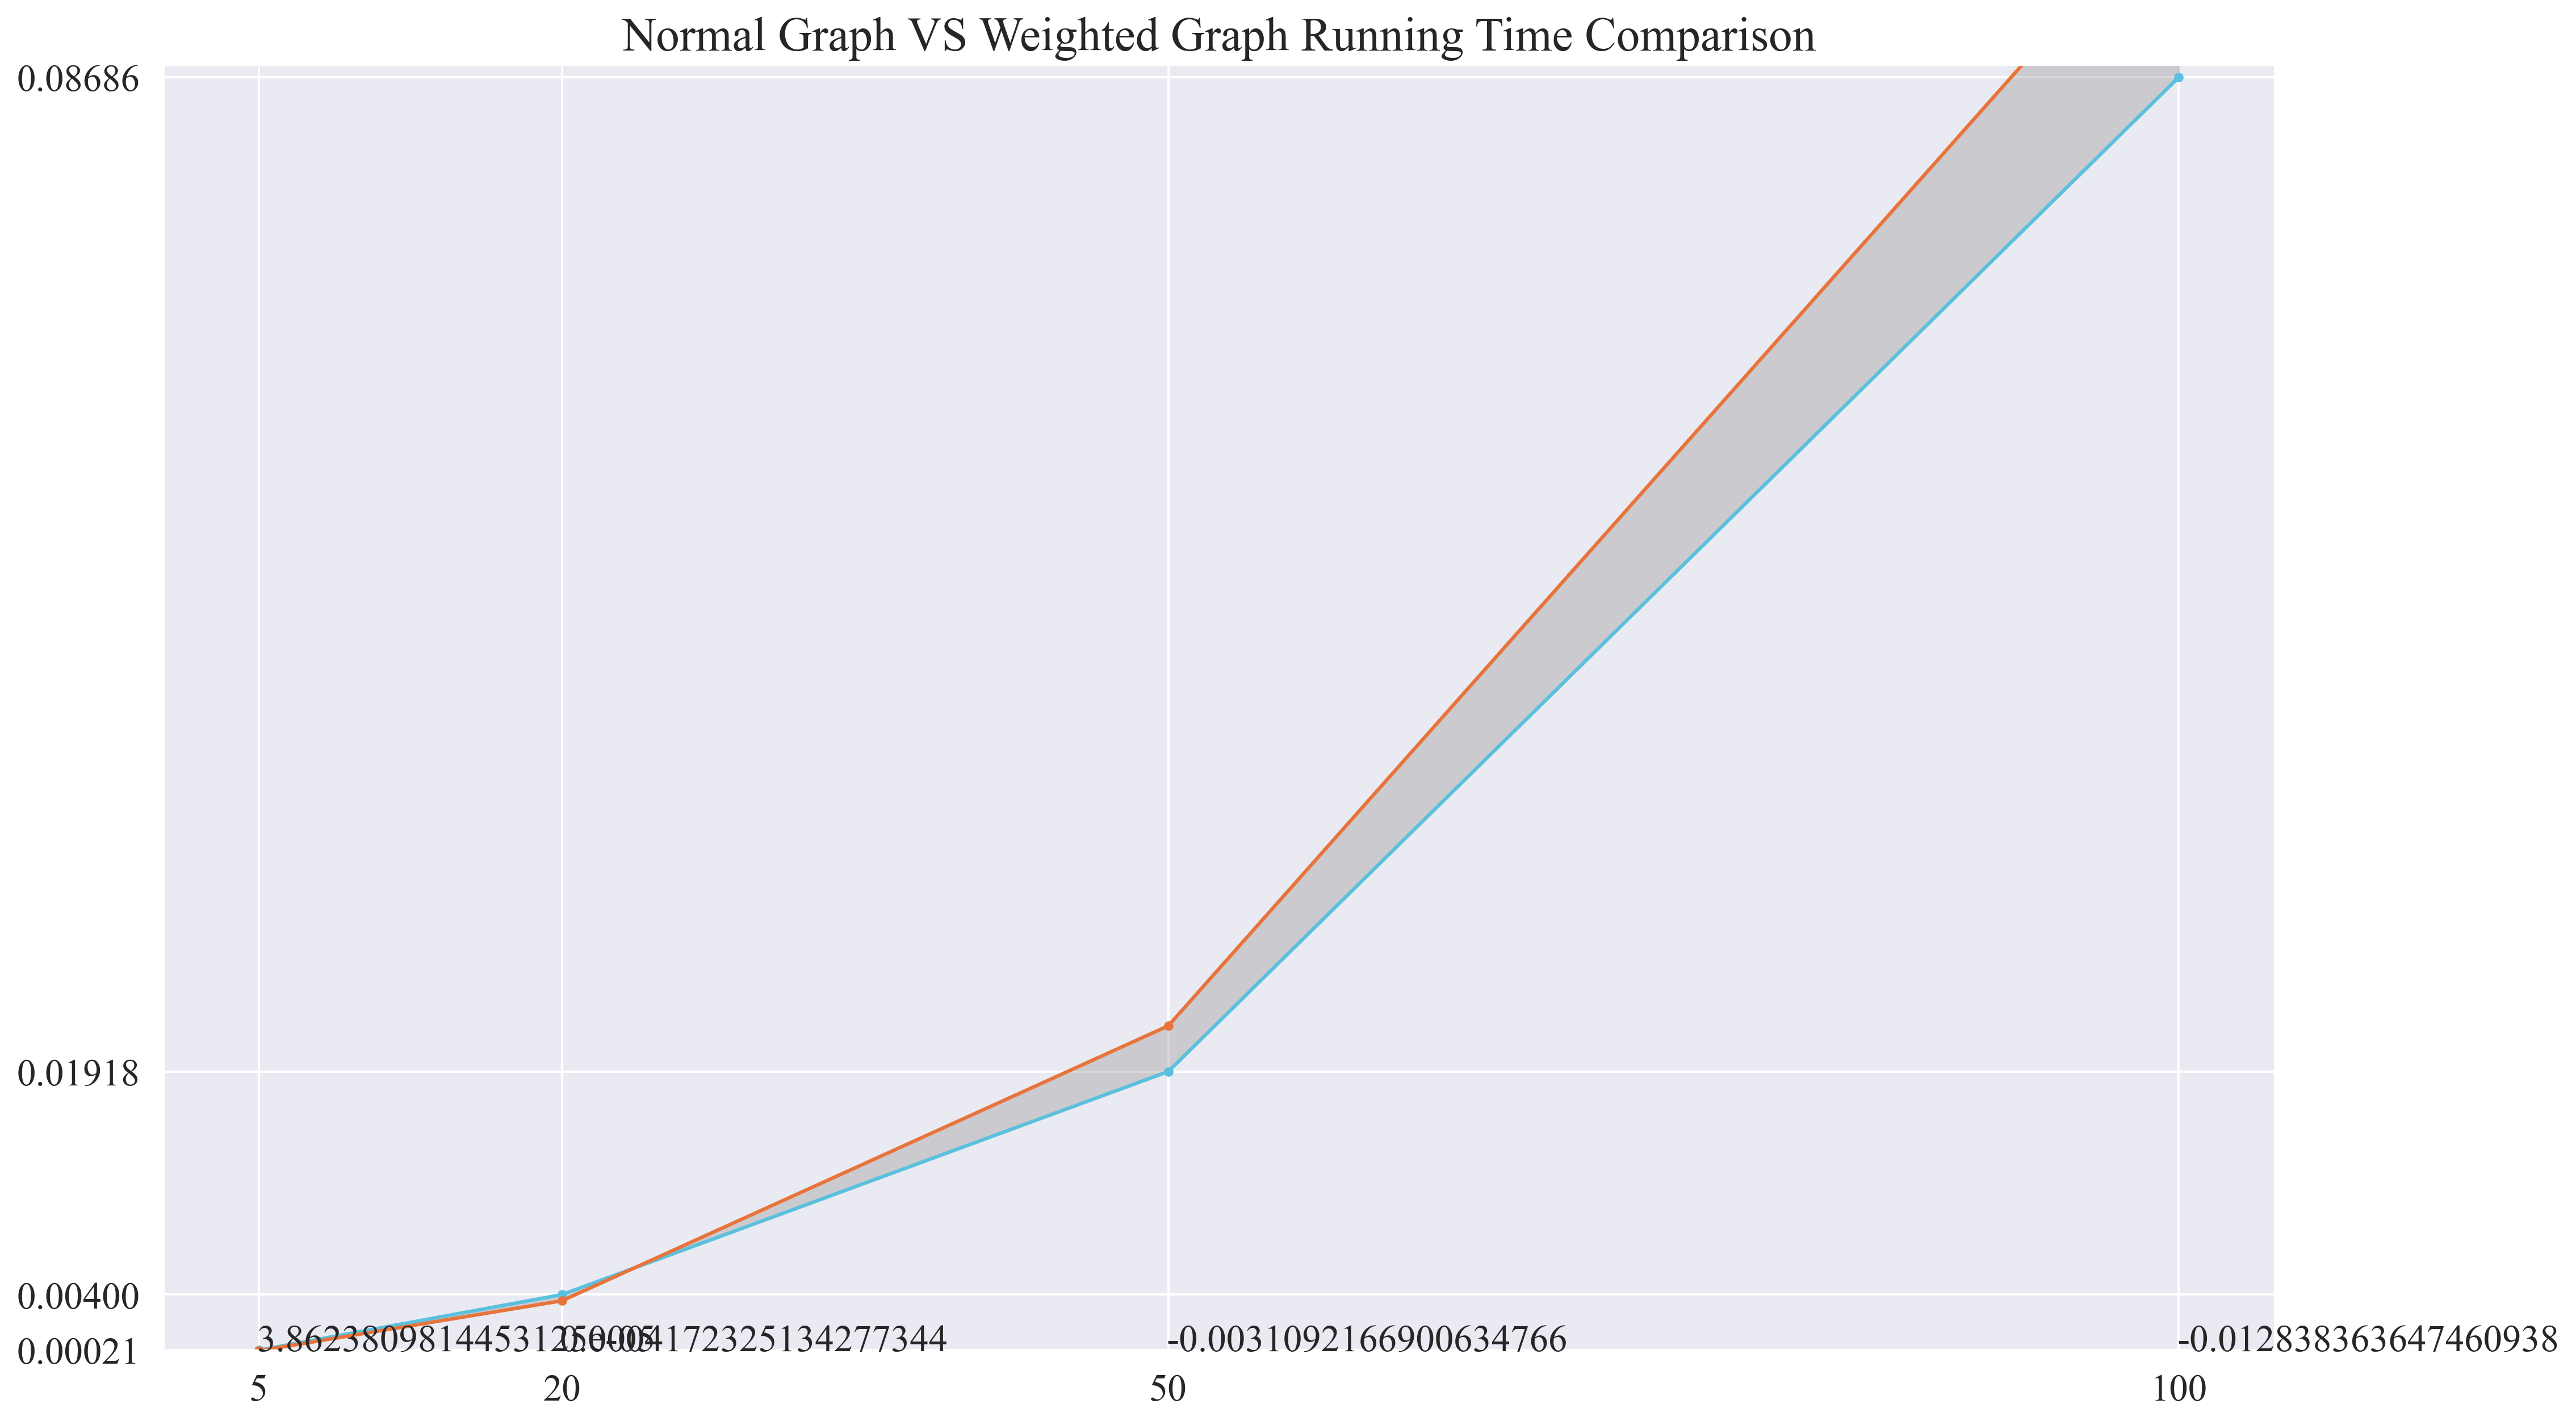

In [142]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
sns.set(font='Times New Roman')

d = {'Grid_width'  : [5, 20, 50, 100],
     'result_weight'  : result_weight,
     'result_normal': result_normal}

df = pd.DataFrame(d)

male = df['result_weight'].tolist()
female = df['result_normal'].tolist()
year = df['Grid_width'].tolist()
ymax = max(male)
ymin = min(female)
fig = plt.figure(figsize=(16,10), dpi=300)

# ymin*0.99 should be changed according to the dataset
for ii in range(len(male)):
    plt.text(year[ii]-0.1, ymin*0.99, male[ii]-female[ii], size=16)

plt.plot(year, male, marker=".", color="#5bc0de")
plt.plot(year, female, marker=".", color="#E8743B")
plt.ylim([ymin*0.985, ymax*1.01])
plt.fill_between(year, male, female, color="grey", alpha=0.3)
plt.yticks(male, size=16)
plt.xticks(year, size=16)
plt.title("Normal Graph VS Weighted Graph Running Time Comparison", fontsize=20)
plt.show()

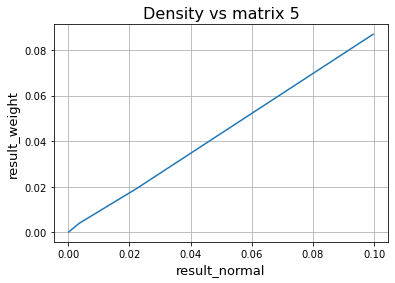

In [126]:
import matplotlib.pyplot as plt
%matplotlib inline

x = result_normal
y = result_weight

fig, ax = plt.subplots()
ax.set_title("Density vs matrix 5", fontsize='16')
ax.plot(x,y)
# plt.set_title('Run Time Between Three Functions')
ax.xaxis.set_label_text("result_normal",fontsize='13')
ax.yaxis.set_label_text("result_weight",fontsize='13')
plt.grid()
plt.show()

In [90]:
if __name__ == "__main__":
    grid = [[0,1,1,1,0,0],
            [0,0,0,0,0,0],
            [0,1,1,1,0,0],
            [0,1,1,1,0,0],
            [0,1,1,1,0,0],
            [0,1,1,1,0,0]]
    start = [0,0]
    end = [5,5]
    cost = 1 
    start_time = time.time()
    result = weighted_search(grid,start,end,weight_grid)
    end_time = time.time()
    total_time = end_time - start_time
    
    start_time1 = time.time()
    result1 = normal_search(grid,start,end,cost)
    end_time1 = time.time()
    total_time1 = end_time1 - start_time1
    print("weighted_search result",result)
    print("weighted_search total time",total_time)
    print("normal result",result1)
    print("normal total time",total_time1)
    

weighted_search result [[0, 0], [1, 0], [1, 1], [1, 2], [1, 3], [1, 4], [2, 4], [3, 4], [4, 4], [5, 4], [5, 5]]
weighted_search total time 0.0003859996795654297
normal result [[0, 0], [1, 0], [1, 1], [1, 2], [1, 3], [1, 4], [2, 4], [3, 4], [4, 4], [5, 4], [5, 5]]
normal total time 0.0004930496215820312


In [140]:
weight_grid = [[1 for j in range(len(grid[0]))]for i in range(len(grid))]
for x in range(len(weight_grid)):
    for y in range(len(weight_grid[x])):
        weight_grid[x][y] = y
        
for x in range(len(weight_grid)):
    for y in range(len(weight_grid[x])):
        if weight_grid[x][y] == x:
            break
        else:
            weight_grid[x][y] = x

In [63]:
weight_grid

[[0, 1, 2, 3, 4, 5],
 [1, 1, 2, 3, 4, 5],
 [2, 2, 2, 3, 4, 5],
 [3, 3, 3, 3, 4, 5],
 [4, 4, 4, 4, 4, 5],
 [5, 5, 5, 5, 5, 5]]

In [141]:
weight_grid

[[0, 1, 2, 3, 4, 5],
 [1, 1, 2, 3, 4, 5],
 [2, 2, 2, 3, 4, 5],
 [3, 3, 3, 3, 4, 5],
 [4, 4, 4, 4, 4, 5],
 [5, 5, 5, 5, 5, 5]]